In [181]:
import berserk;
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;

In [182]:
f = open("lichess.txt", "r")
token = (f.read())
token = token.strip()
session = berserk.TokenSession(token)
client = berserk.Client (session=session)

In [183]:
client.account.get()

{'id': 'brechner',
 'username': 'Brechner',
 'perfs': {'blitz': {'games': 1540, 'rating': 1556, 'rd': 50, 'prog': -11},
  'puzzle': {'games': 3, 'rating': 1647, 'rd': 310, 'prog': 0, 'prov': True},
  'bullet': {'games': 9, 'rating': 1223, 'rd': 154, 'prog': 0, 'prov': True},
  'correspondence': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'classical': {'games': 0,
   'rating': 1500,
   'rd': 500,
   'prog': 0,
   'prov': True},
  'rapid': {'games': 0, 'rating': 1500, 'rd': 500, 'prog': 0, 'prov': True}},
 'createdAt': datetime.datetime(2019, 1, 20, 11, 46, 42, 448000, tzinfo=datetime.timezone.utc),
 'seenAt': datetime.datetime(2022, 10, 30, 18, 22, 10, 125000, tzinfo=datetime.timezone.utc),
 'playTime': {'total': 343171, 'tv': 0},
 'url': 'https://lichess.org/@/Brechner',
 'count': {'all': 1550,
  'rated': 1549,
  'ai': 0,
  'draw': 68,
  'drawH': 68,
  'loss': 749,
  'lossH': 749,
  'win': 733,
  'winH': 733,
  'bookmark': 0,
  'playing': 0,
  'impor

In [184]:
brechner_data = client.users.get_rating_history('Brechner')
brechner_data

[{'name': 'Bullet',
  'points': [Entry(year=2019, month=0, day=28, rating=1319),
   Entry(year=2021, month=6, day=31, rating=1174),
   Entry(year=2021, month=7, day=14, rating=1218),
   Entry(year=2021, month=8, day=1, rating=1219),
   Entry(year=2021, month=8, day=2, rating=1223)]},
 {'name': 'Blitz',
  'points': [Entry(year=2021, month=6, day=28, rating=1210),
   Entry(year=2021, month=6, day=29, rating=1454),
   Entry(year=2021, month=6, day=30, rating=1572),
   Entry(year=2021, month=6, day=31, rating=1556),
   Entry(year=2021, month=7, day=1, rating=1614),
   Entry(year=2021, month=7, day=2, rating=1613),
   Entry(year=2021, month=7, day=3, rating=1627),
   Entry(year=2021, month=7, day=4, rating=1649),
   Entry(year=2021, month=7, day=6, rating=1692),
   Entry(year=2021, month=7, day=7, rating=1683),
   Entry(year=2021, month=7, day=14, rating=1661),
   Entry(year=2021, month=7, day=15, rating=1660),
   Entry(year=2021, month=7, day=16, rating=1620),
   Entry(year=2021, month=7, 

In [185]:
brechner_data = client.users.get_rating_history('Brechner')
df = pd.DataFrame(brechner_data[1])
df.head()

,name,points
0,Blitz,"(2021, 6, 28, 1210)"
1,Blitz,"(2021, 6, 29, 1454)"
2,Blitz,"(2021, 6, 30, 1572)"
3,Blitz,"(2021, 6, 31, 1556)"
4,Blitz,"(2021, 7, 1, 1614)"


In [186]:
df.get(["points"])


,points
0,"(2021, 6, 28, 1210)"
1,"(2021, 6, 29, 1454)"
2,"(2021, 6, 30, 1572)"
3,"(2021, 6, 31, 1556)"
4,"(2021, 7, 1, 1614)"
...,...
338,"(2022, 9, 14, 1578)"
339,"(2022, 9, 22, 1571)"
340,"(2022, 9, 23, 1564)"
341,"(2022, 9, 27, 1557)"


In [187]:
chess_data = pd.DataFrame(df['points'].to_list(),columns=['year','month','day','rating'])
chess_data

,year,month,day,rating
0,2021,6,28,1210
1,2021,6,29,1454
2,2021,6,30,1572
3,2021,6,31,1556
4,2021,7,1,1614
...,...,...,...,...
338,2022,9,14,1578
339,2022,9,22,1571
340,2022,9,23,1564
341,2022,9,27,1557


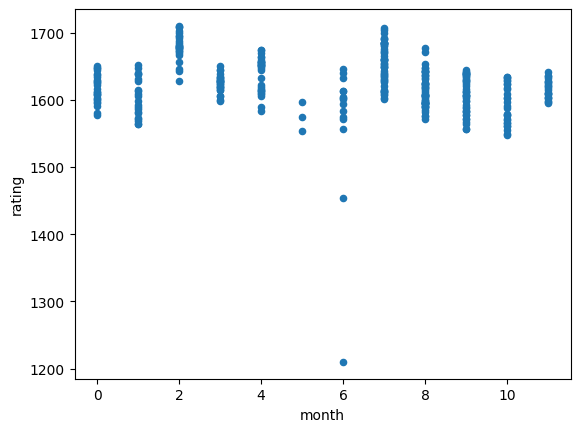

In [188]:
chess_data.plot(kind = 'scatter', x = 'month', y = 'rating')

plt.show()

In [189]:
chess_data.describe()

,year,month,day,rating
count,343.000000,343.000000,343.000000,343.000000
mean,2021.612245,5.973761,15.868805,1622.481050
std,0.487950,3.370305,9.012515,41.782982
min,2021.000000,0.000000,1.000000,1210.000000
25%,2021.000000,3.000000,8.000000,1601.000000
50%,2022.000000,7.000000,16.000000,1623.000000
75%,2022.000000,9.000000,24.000000,1644.500000
max,2022.000000,11.000000,31.000000,1710.000000


In [190]:
new_array = np.array(chess_data)
new_array

array([[2021,    6,   28, 1210],
       [2021,    6,   29, 1454],
       [2021,    6,   30, 1572],
       ...,
       [2022,    9,   23, 1564],
       [2022,    9,   27, 1557],
       [2022,    9,   30, 1556]])

In [191]:
year = chess_data.groupby('year');
year.first()

,month,day,rating
year,,,
2021,6,28,1210
2022,0,2,1608


In [192]:
year_month = chess_data.groupby(['year', 'month']);
year_month.first()

day  rating
year month             
2021 6       28    1210
     7        1    1614
     8        1    1591
     9        1    1571
     10       1    1588
     11       2    1628
2022 0        2    1608
     1        1    1572
     2        1    1695
     3        1    1626
     4        1    1653
     5        1    1597
     6        9    1575
     7        1    1661
     8        2    1677
     9        1    1623

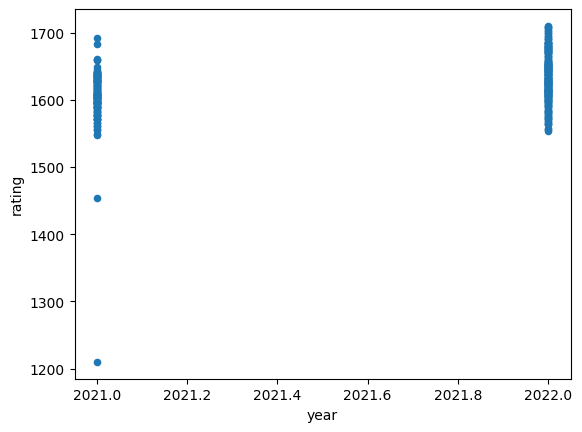

In [193]:
chess_data.groupby(['rating']).mean()
chess_data.plot.scatter( x= 'year', y = 'rating' );

In [194]:
chess_data_copy = chess_data.copy()

In [195]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    343 non-null    int64
 1   month   343 non-null    int64
 2   day     343 non-null    int64
 3   rating  343 non-null    int64
dtypes: int64(4)
memory usage: 10.8 KB
